<div style="display: flex; text-align:center; background-color: #014040 ;border: 1px solid RGB(51,165,182);" >
<h1 style="margin: auto;color:RGB(255,255,255); padding: 30px;margin-left: 2em; text-indent: -2em">MODELISATION DE PRIX DE BIENS IMMOBILIERS
    
</h1>
</div>

<div style="border-style: double;border-width: 5px;border-color: #731702;color: #731702" >
<h3 style="margin: auto; padding: 10px ;margin-left: 4.5em; text-indent: -4.5em"><a id="00">SOMMAIRE</a> </h3>
        
  - 1. **[PREPARATION DE DONNEES](#1)**
     - 1. [Qualité des données](#11)
     - 2. [Nettoyage des données](#12)
  
  - 2. **[ANALYSES DESCRIPTIVES](#2)**
     - 1. [Analyses univariées](#21)
     - 2. [Analyses bivariées](#22)
    
  - 3. **[MODELISATIONS DU PRIX](#2)**
     - 1. [Arbre de regression](#21)
     - 2. [Forêt Aléatoires](#22)
    
</div>


<div style="border: 2px solid #731702;" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em ">0.0 - Introduction</h3>
</div>

Dans cette étude, nous tenterons de modéliser le prix de biens immobiliers à l'aide d'une méthode de machine learning pouvant </br>être considérée comme 
une extension moderne de la méthode hédonique : la Forêt Aléatoire (Random Forest).</br>
La méthode hédonique repose sur le principe fondamental selon lequel le prix d'un bien est une fonction de ses attributs.</br>
Cette méthode permet de fournir une première estimation du prix, avant d'éventuels ajustements économiques et/ou réglementaires.</br>
Nous utiliserons le jeu de données "California Housing", qui contient plusieurs caractéristiques de biens immobiliers</br> situés en Californie, aux États-Unis.

<div style="border: 2px solid #731702;" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em ">0.1 - Importation des librairies et declaration de fonctions</h3>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_row',100)
%matplotlib inline

In [2]:
# Requirements

import matplotlib
#import scipy
import sklearn

# Récupérer les versions des bibliothèques
versions = [
    f"pandas=={pd.__version__}",
    f"numpy=={np.__version__}",
    f"seaborn=={sns.__version__}",
    f"matplotlib=={matplotlib.__version__}",
#    f"scipy=={scipy.__version__}",
    f"sklearn=={sklearn.__version__}"
]

# Écrire dans un fichier .txt
with open("requirements.txt", "w") as file:
    file.write("\n".join(versions))

print("Les versions ont été écrites dans 'requirements.txt'.")

# Lire et afficher le contenu du fichier
with open("requirements.txt", "r") as file:
    content = file.read()

print("Contenu du fichier requirements.txt :")
print(content)

Les versions ont été écrites dans 'requirements.txt'.
Contenu du fichier requirements.txt :
pandas==1.3.4
numpy==1.22.4
seaborn==0.11.2
matplotlib==3.4.3
sklearn==1.5.1


In [3]:
#pip install missingno

<div style="background-color: #014040 ;" >
<h2 style="margin: auto;color:RGB(255,255,255) ;padding: 20px;margin-left: 4.5em; text-indent: -4.5em">1 - PREPARATION DE DONNEES</h2>
</div>

<div style="border: 1px solid #014040 ;" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="11">1 - 1. Qualité des données</a></h3>
</div>

In [4]:
data = pd.read_csv("./data/input/housing.csv",decimal=",",sep=';')
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0          880           129.0   
1        -122.22     37.86                21.0         7099          1106.0   
2        -122.24     37.85                52.0         1467           190.0   
3        -122.25     37.85                52.0         1274           235.0   
4        -122.25     37.85                52.0         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0         1665           374.0   
20636    -121.21     39.49                18.0          697           150.0   
20637    -121.22     39.43                17.0         2254           485.0   
20638    -121.32     39.43                18.0         1860           409.0   
20639    -121.24     39.37                16.0         2785           616.0   

       population  households  median_income  median_house_value  \
0             322         126         8.3252              452600   
1            2401        1138         8.3014              358500   
2             496         177         7.2574              352100   
3             558         219         5.6431              341300   
4             565         259         3.8462              342200   
...           ...         ...            ...                 ...   
20635         845         330         1.5603               78100   
20636         356         114         2.5568               77100   
20637        1007         433         1.7000               92300   
20638         741         349         1.8672               84700   
20639        1387         530         2.3886               89400   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(5), int64(4), object(1)
memory usage: 1.6+ MB


Les variables présentes dans le jeu de données sont les suivantes :

1. **longitude :** Longitude de la localisation du logement.
2. **latitude :** Latitude de la localisation du logement.
3. **housing_median_age :** Âge médian des logements dans la région.
4. **total_rooms :** Nombre total de chambres dans la région.
5. **total_bedrooms :** Nombre total de chambres à coucher dans la région.
6. **population :** Population totale dans la région
7. **households :** Nombre total de ménages dans la région
8. **median_income :** Revenu médian des ménages dans la région
9. **median_house_value :** Valeur médiane des maisons dans la région
10. **ocean_proximity :** Proximité de la maison par rapport à l'océan (côte, île, etc.)


In [6]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Nous pouvons constater 207 valeurs manquantes dans le jeux de données pour la variables total_bedrooms.

In [7]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [8]:
# Filtrer les colonnes numériques uniquement
numerical_columns = data.select_dtypes(include=['number']).columns

# Calculer les outliers pour chaque colonne numérique
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)  # Premier quartile
    Q3 = data[col].quantile(0.75)  # Troisième quartile
    IQR = Q3 - Q1                  # Intervalle interquartile

    lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
    upper_bound = Q3 + 1.5 * IQR  # Limite supérieure

    # Identifier les outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    print(f"Colonne: {col}")
    print(f"Nombre d'outliers: {len(outliers)}")
#   print(f"Indices des outliers: {outliers.index.tolist()}\n")


Colonne: longitude
Nombre d'outliers: 0
Colonne: latitude
Nombre d'outliers: 0
Colonne: housing_median_age
Nombre d'outliers: 0
Colonne: total_rooms
Nombre d'outliers: 1287
Colonne: total_bedrooms
Nombre d'outliers: 1271
Colonne: population
Nombre d'outliers: 1196
Colonne: households
Nombre d'outliers: 1220
Colonne: median_income
Nombre d'outliers: 681
Colonne: median_house_value
Nombre d'outliers: 1071


<div style="border: 1px solid #014040 ;" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="12">1 - 2. Nettoyage des données - (imputation par la mediane)</a></h3>
</div>

In [9]:
# On suppose que les régions qui ont la variable total_bedooms manquantes n'ont pas de chambre
# Remplacement des valeurs manquantes par 0 pour la variable 'total_bedrooms'
data['total_bedrooms'].fillna(np.std(data['total_bedrooms']), inplace=True)
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Traitement des valeurs extrêmes

<div style="background-color: #014040 ;" >
<h2 style="margin: auto;color:RGB(255,255,255) ;padding: 20px;margin-left: 4.5em; text-indent: -4.5em">2 - ANALYSES DESCRIPTIVES</h2>
</div>

<div style="border: 1px solid #014040 ;" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="21">2 - 1. Analyses univariées</a></h3>
</div>

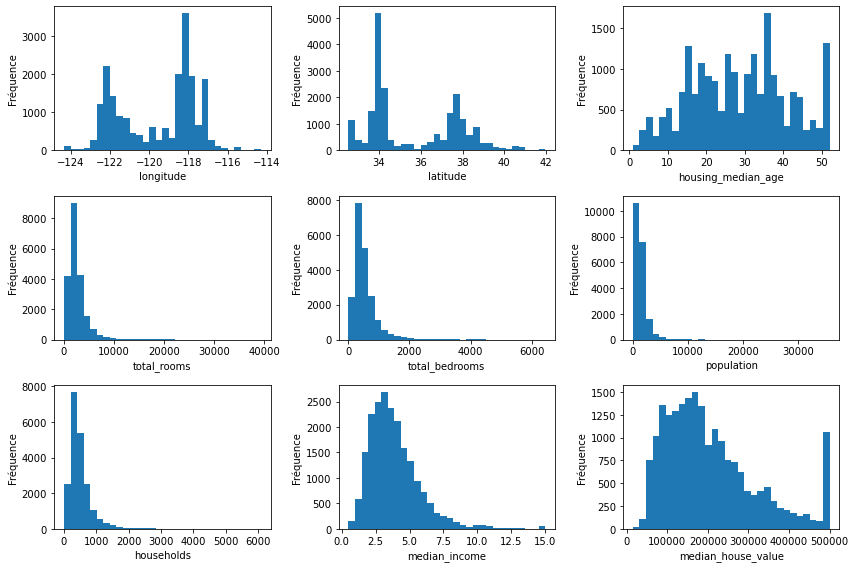

In [10]:
# Description univariée des variables numériques

# Sélection des variables quantitatives
quant_vars = data.select_dtypes(include=np.number).columns

# Création des subplots pour chaque variable quantitative sur une même figure
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axs = axs.flatten()
for i, var in enumerate(quant_vars):
    axs[i].hist(data[var], bins=30)
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Fréquence')
plt.tight_layout()
plt.show()


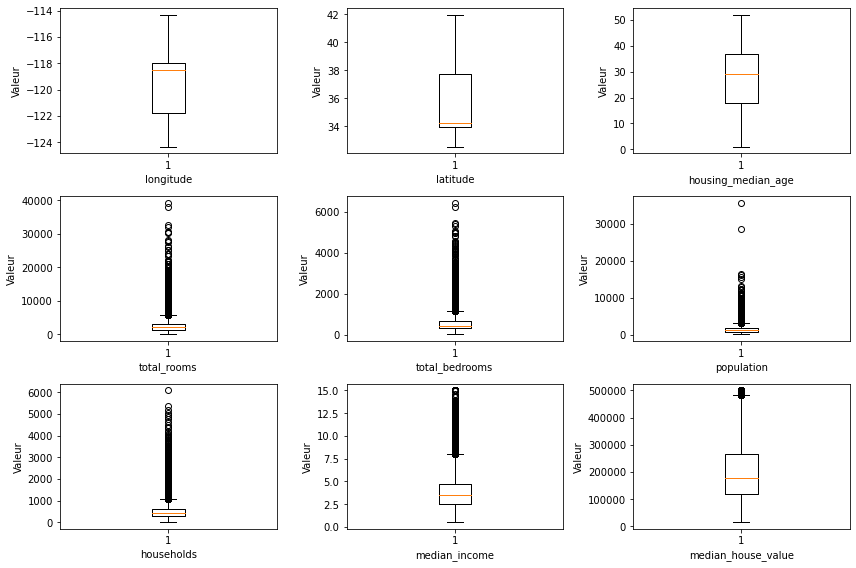

In [11]:
quant_vars = data.select_dtypes(include=np.number).columns

# Création des subplots pour chaque variable quantitative sur une même figure
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axs = axs.flatten()
for i, var in enumerate(quant_vars):
    axs[i].boxplot(data[var])
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Valeur')
plt.tight_layout()
plt.show()
fig.savefig('./Data/output/Quant_supplots.png', dpi=fig.dpi*10)
plt.close(fig)

#### Description de la variable catégorielle 'ocean_proximity'

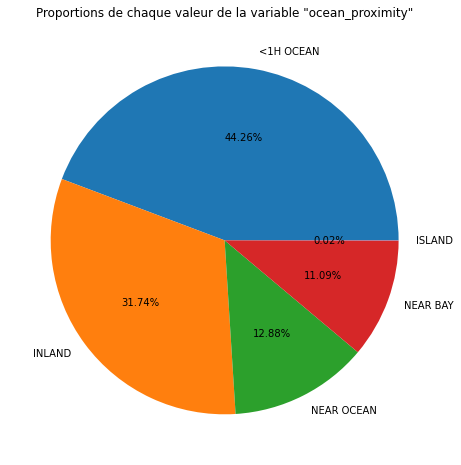

In [12]:


# Calcul des proportions pour chaque valeur de la variable catégorielle
prop_counts = data['ocean_proximity'].value_counts(normalize=True)

# Création du pie chart
fig = plt.figure(figsize=(10, 8))
plt.pie(prop_counts, labels=prop_counts.index, autopct='%1.2f%%')
plt.title('Proportions de chaque valeur de la variable "ocean_proximity"')
plt.show()
fig.savefig('./Data/output/Ocean_proximity_pieChart.png', dpi=fig.dpi*10)
plt.close(fig)

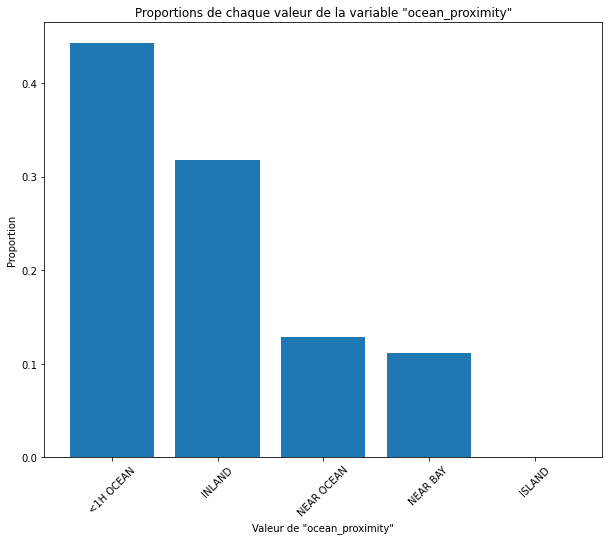

In [13]:

# Calcul des proportions pour chaque valeur de la variable catégorielle
prop_counts = data['ocean_proximity'].value_counts(normalize=True)

# Création du barplot
fig = plt.figure(figsize=(10, 8))
plt.bar(x=prop_counts.index, height=prop_counts)
plt.xticks(rotation=45)
plt.xlabel('Valeur de "ocean_proximity"')
plt.ylabel('Proportion')
plt.title('Proportions de chaque valeur de la variable "ocean_proximity"')
plt.show()
fig.savefig('./Data/output/Ocean_proximity_barPlot.png', dpi=fig.dpi*10)
plt.close(fig)

<div style="border: 1px solid RGB(136,202,252);" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="22">2 - 2. Analyses bivariées</a></h3>
</div>

#### Corrélation entre les variables numériques

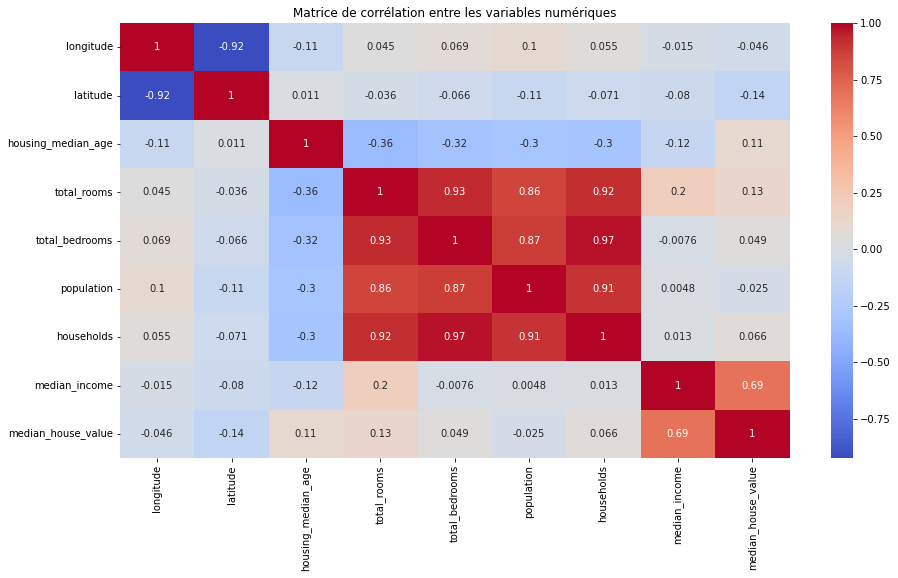

In [14]:
import seaborn as sns

# Corrélation entre les variables numériques
fig = plt.figure(figsize=(15,8))
corr_matrix = data.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()
fig.savefig('./Data/output/correlation_matrix.png',dpi=fig.dpi*10)
plt.close(fig)


#### Spearman

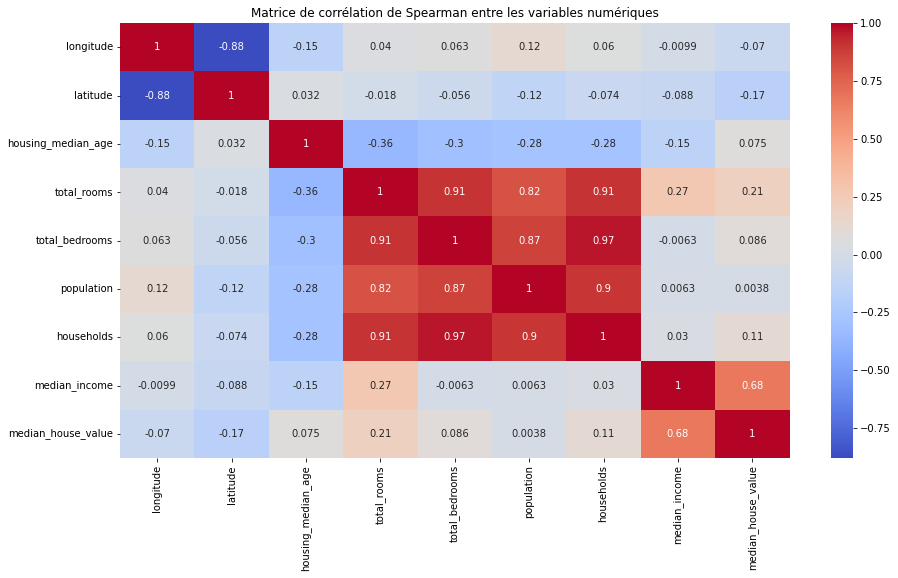

In [15]:
# Sélection des variables numériques
num_vars = data.select_dtypes(include=np.number).columns
# Calcul de la matrice de corrélation de Spearman
corr_matrix = data[num_vars].corr(method='spearman')

# Affichage de la matrice de corrélation de Spearman
fig = plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation de Spearman entre les variables numériques')
plt.show()
fig.savefig('./Data/output/matrix_spearman.png', dpi=fig.dpi*10)
plt.close(fig)

#### Relation entre la variable cible 'median_house_value' et les variables numériques

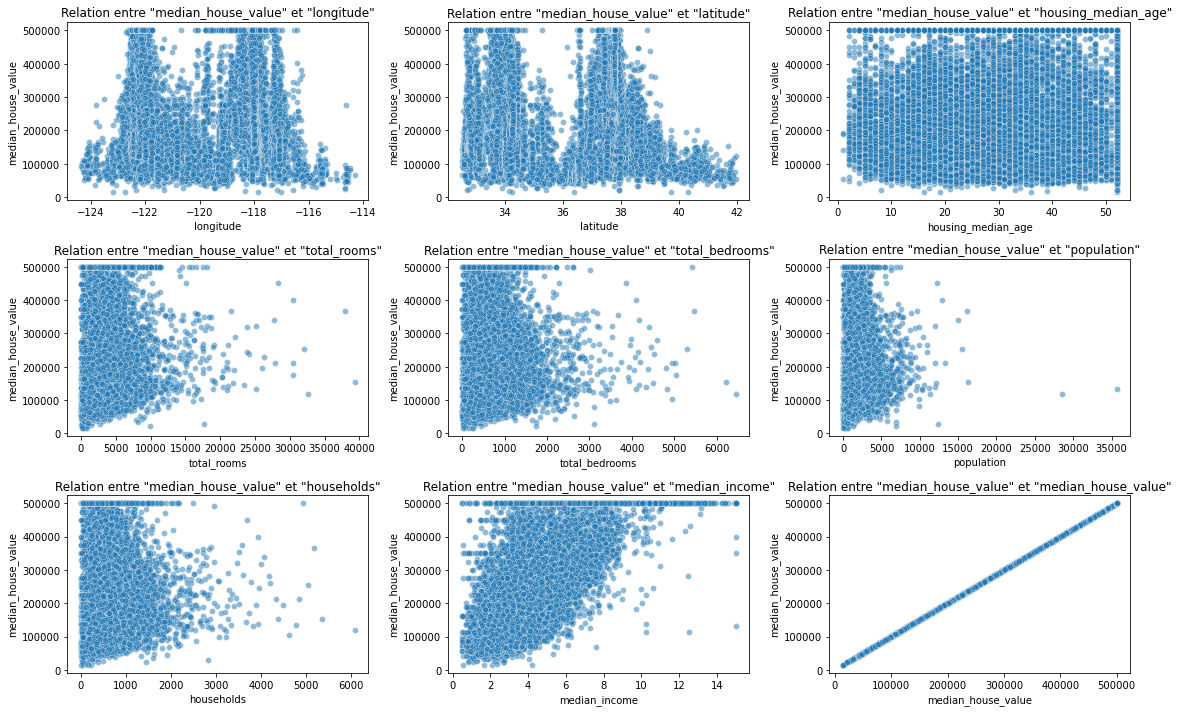

In [16]:
# Sélection des variables numériques
num_vars = data.select_dtypes(include=np.number).columns

# Calcul de la taille de la matrice des subplots en fonction du nombre de variables numériques
n_cols = 3
n_rows = int(np.ceil(len(num_vars) / n_cols))

# Affichage des scatterplots pour chaque variable numérique sur une même figure avec des subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='median_house_value', data=data, alpha=0.5, ax=axs[i])
    axs[i].set_title('Relation entre "median_house_value" et "{}"'.format(var))

# Ajout des titres et des étiquettes des axes
plt.tight_layout()
plt.show()
fig.savefig("./Data/output/scatter_medianHouseValue.png",dpi=fig.dpi*10)
plt.close(fig)

#### Relation entre la variable cible 'median_house_value' et la variable catégorielle 'ocean_proximity'

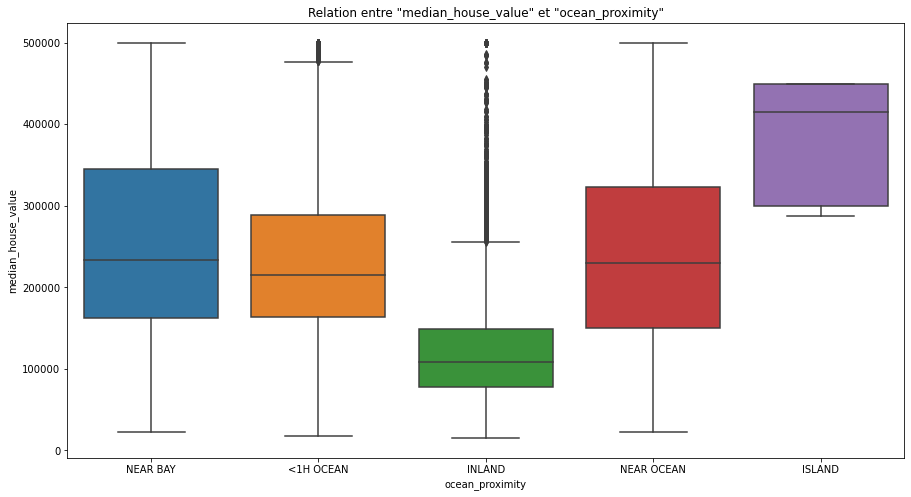

In [17]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('Relation entre "median_house_value" et "ocean_proximity"')
plt.show()
fig.savefig("./Data/output/boxplot_ocean_proximity.png",dpi=fig.dpi*10)
plt.close(fig)

### Relation entre les variables numériques

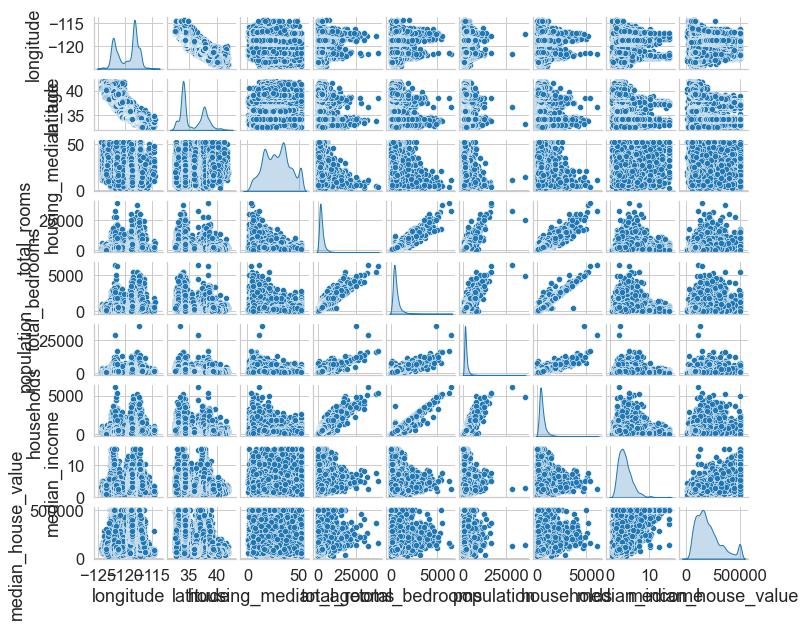

In [18]:
sns.set_context("notebook", font_scale=1.5)
sns.set_style("whitegrid")

pairplot_fig = sns.pairplot(data[num_vars], diag_kind="kde")  # Par exemple, kernel density plot sur la diagonale
pairplot_fig.fig.set_size_inches(10, 8)  # Ajuste la taille ici si nécessaire

pairplot_fig.fig.savefig("./Data/output/pairplot.png", dpi=300)


<Figure size 576x576 with 0 Axes>

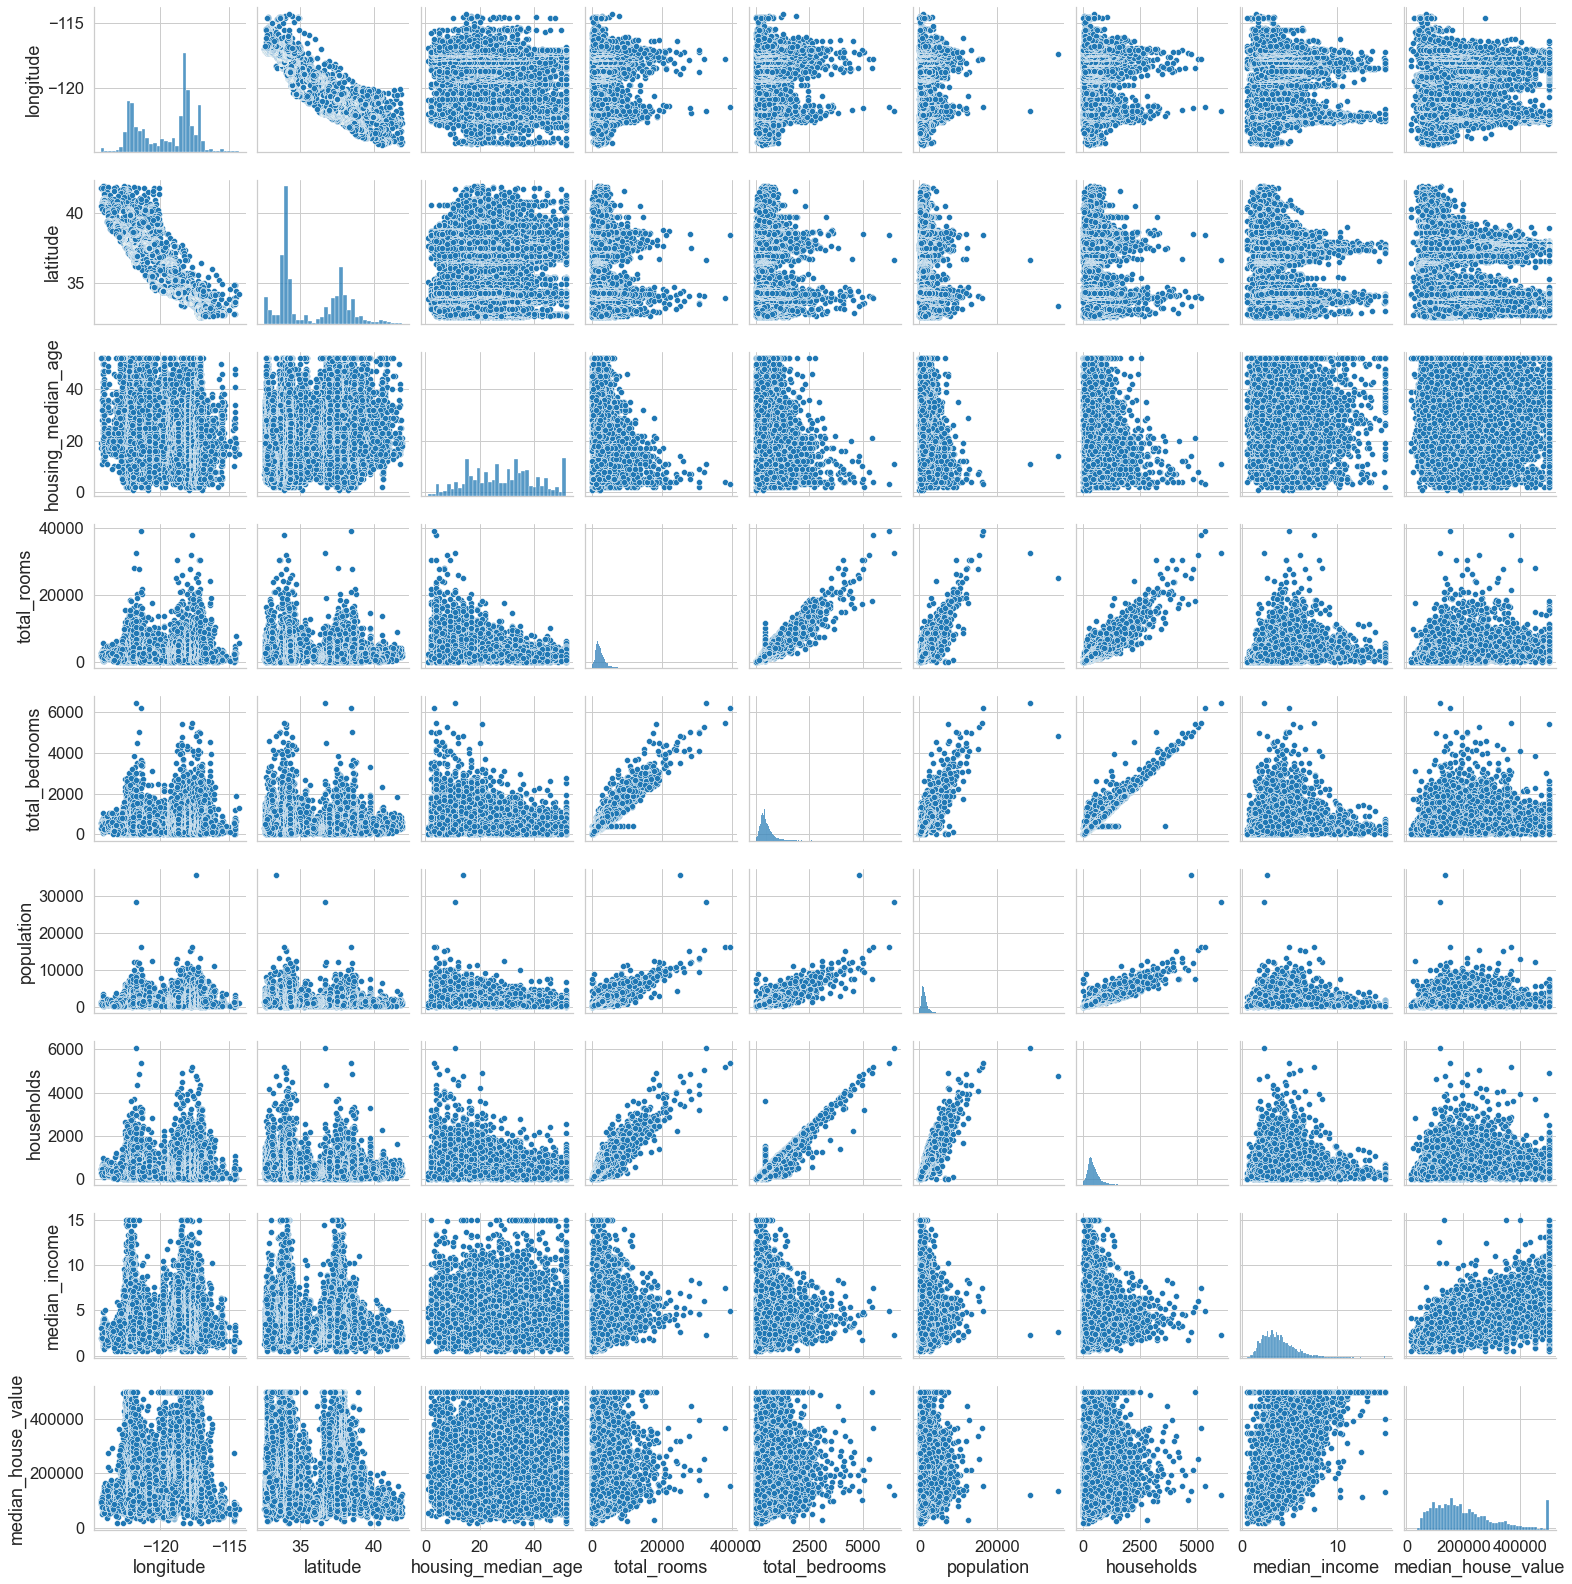

In [19]:
fig = plt.figure(figsize=(8,8))
sns.pairplot(data[num_vars])
plt.show()
fig.savefig("./Data/output/pairplot.png",dpi=fig.dpi*10)
plt.close(fig)

<div style="background-color: #014040 ;" >
<h2 style="margin: auto;color:RGB(255,255,255) ;padding: 20px;margin-left: 4.5em; text-indent: -4.5em">3 - MODELISATION DU PRIX - FORÊT ALEATOIRE</h2>
</div>

#### Les Variables

In [20]:
pip install --upgrade scikit-learn


  Using cached scikit_learn-1.6.0-cp39-cp39-win_amd64.whl (11.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-1.5.1.dist-info\\INSTALLER'
Consider using the `--user` option or check the permissions.



#### Standardisation de la donnée

In [21]:
from sklearn.preprocessing import OneHotEncoder
# Sélection des variables catégorielles
cat_vars = ['ocean_proximity']

# Encodage binaire des variables catégorielles
encoder = OneHotEncoder(sparse_output=False)
cat_data = pd.DataFrame(encoder.fit_transform(data[cat_vars]))
cat_data.columns = encoder.get_feature_names_out(cat_vars)

# Remplacement des variables catégorielles par les variables encodées
data = pd.concat([data.drop(cat_vars, axis=1), cat_data], axis=1)
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0          880           129.0   
1    -122.22     37.86                21.0         7099          1106.0   
2    -122.24     37.85                52.0         1467           190.0   
3    -122.25     37.85                52.0         1274           235.0   
4    -122.25     37.85                52.0         1627           280.0   

   population  households  median_income  median_house_value  \
0         322         126         8.3252              452600   
1        2401        1138         8.3014              358500   
2         496         177         7.2574              352100   
3         558         219         5.6431              341300   
4         565         259         3.8462              342200   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       1.0                         0.0  
1                       1.0                         0.0  
2                       1.0                         0.0  
3                       1.0                         0.0  
4                       1.0                         0.0

In [22]:
# Séparation des données en variables explicatives et variable cible
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [23]:
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

In [24]:
#### Diviser la base en train en test

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<div style="border: 1px solid #014040 ;" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="31">3 - 1. Arbre de regression</a></h3>
</div>

#### Arbre de régression non optimisé

In [26]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

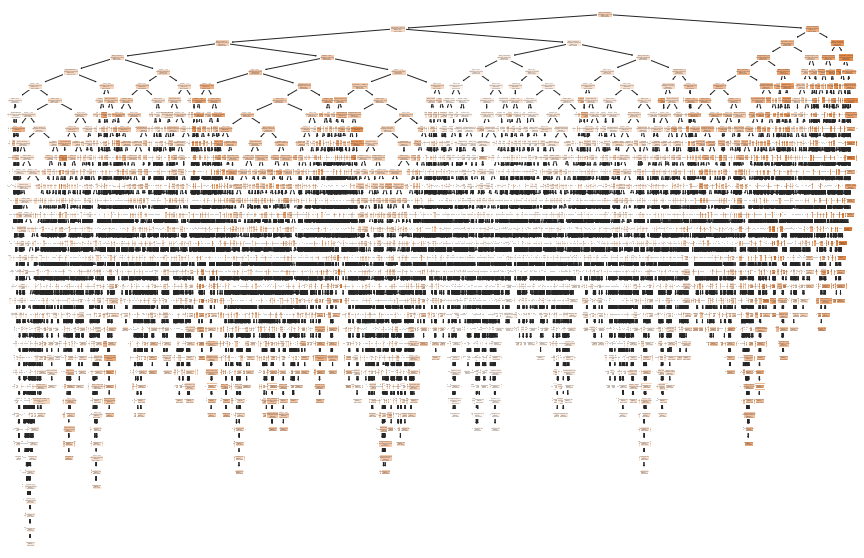

In [27]:
# Affichage de l'arbre
fig = plt.figure(figsize=(15,10))
plot_tree(tree, feature_names=X_train.columns, filled=True)
plt.show()
fig.savefig("./Data/output/ArbreNonOptimise.png",dpi=fig.dpi*10)
plt.close(fig)

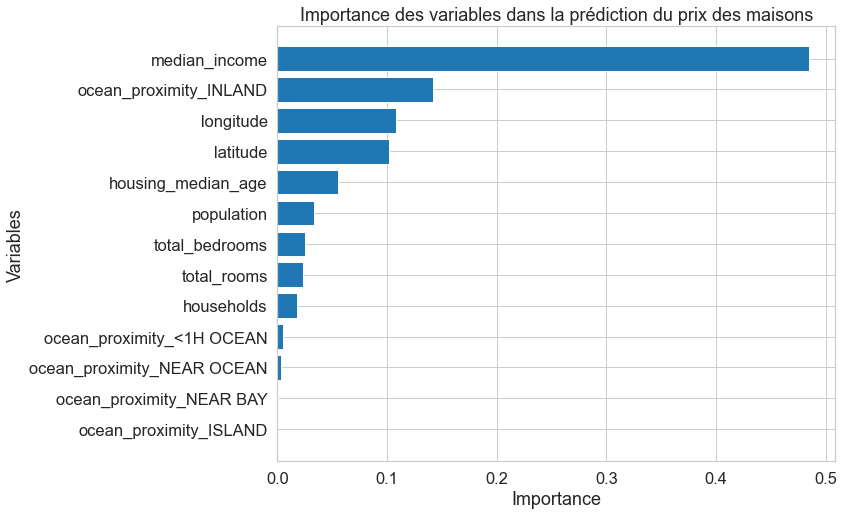

In [28]:
# Affichage de l'importance des variables
importances = pd.Series(tree.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values()
fig = plt.figure(figsize=(10,8))
plt.barh(importances_sorted.index, importances_sorted)
plt.title('Importance des variables dans la prédiction du prix des maisons')
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.show()
fig.savefig("./Data/output/importanceDesVariables.png",dpi=fig.dpi*10)

In [29]:
#PERFORMANCES

from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score,r2_score,mean_squared_error

# Prédiction sur la base d'apprentissage et la base de test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Calcul des métriques sur la base d'apprentissage et la base de test
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_medae = median_absolute_error(y_train, y_train_pred)
test_medae = median_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_evs = explained_variance_score(y_train, y_train_pred)
test_evs = explained_variance_score(y_test, y_test_pred)

# Affichage des résultats dans un tableau
results = pd.DataFrame({'Métrique': ['RMSE', 'MAE', 'MedAE', 'R2', 'EVS'], 
                        'Apprentissage': [train_rmse, train_mae, train_medae, train_r2, train_evs], 
                        'Test': [test_rmse, test_mae, test_medae, test_r2, test_evs]})
results.set_index('Métrique', inplace=True)
results

Apprentissage          Test
Métrique                             
RMSE                0.0  68974.432112
MAE                 0.0  43540.012597
MedAE               0.0  25100.000000
R2                  1.0      0.636948
EVS                 1.0      0.636985

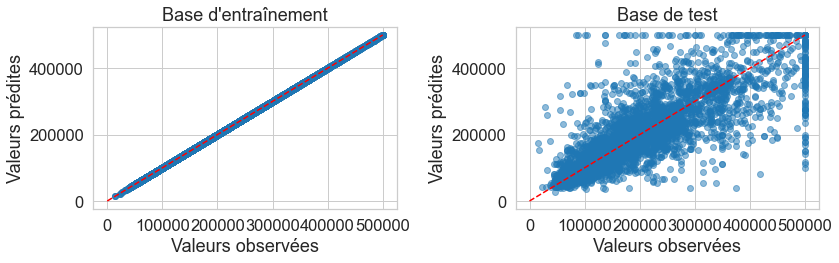

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Graphique pour la base d'entraînement
y_train_pred = tree.predict(X_train)
axs[0].scatter(y_train, y_train_pred, alpha=0.5)
axs[0].plot([0, np.max(y_train)], [0, np.max(y_train)], 'r--')
axs[0].set_xlabel('Valeurs observées')
axs[0].set_ylabel('Valeurs prédites')
axs[0].set_title('Base d\'entraînement')

# Graphique pour la base de test
y_test_pred = tree.predict(X_test)
axs[1].scatter(y_test, y_test_pred, alpha=0.5)
axs[1].plot([0, np.max(y_test)], [0, np.max(y_test)], 'r--')
axs[1].set_xlabel('Valeurs observées')
axs[1].set_ylabel('Valeurs prédites')
axs[1].set_title('Base de test')

# Affichage des graphiques
plt.tight_layout()
plt.show()
fig.savefig("./Data/output/graphiquesEntrainementTest.png")
plt.close(fig)

#### Arbre optimisé avec un élagage (prunning)

Profondeur optimale : 9


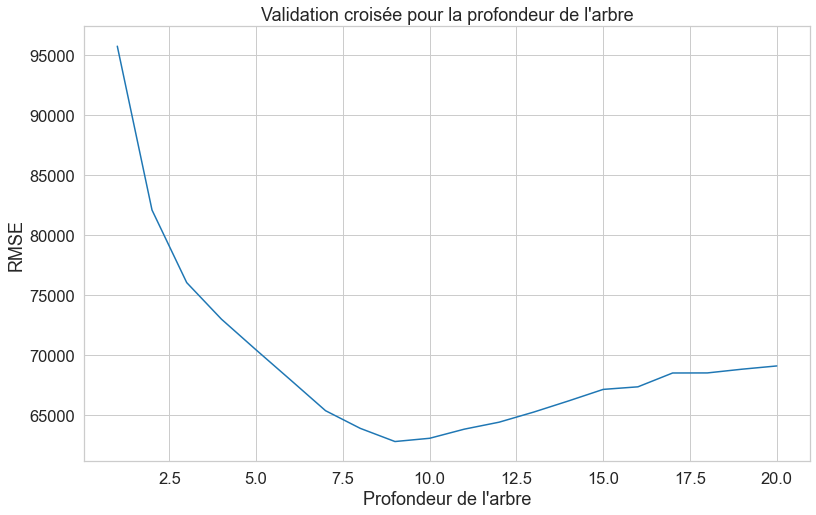

In [31]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille de paramètres
param_grid = {'max_depth': np.arange(1, 21)}

# Instanciation de l'estimateur de l'arbre de décision
tree = DecisionTreeRegressor(random_state=42)

# Instanciation de l'objet GridSearchCV
grid_tree = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Entraînement de l'objet GridSearchCV
grid_tree.fit(X_train, y_train)

# Affichage de la profondeur optimale
print("Profondeur optimale :", grid_tree.best_params_['max_depth'])

# Affichage de la courbe de validation croisée pour la profondeur de l'arbre
fig = plt.figure(figsize=(13,8))
plt.plot(param_grid['max_depth'], np.sqrt(-grid_tree.cv_results_['mean_test_score']))
plt.xlabel('Profondeur de l\'arbre')
plt.ylabel('RMSE')
plt.title('Validation croisée pour la profondeur de l\'arbre')
plt.show()
fig.savefig("./Data/output/validationCroiseeArbre.png",dpi=300)
plt.close(fig)

In [32]:
# Entrainement d'un nouvel arbre avec la profondeur optimale
tree_optimal = DecisionTreeRegressor(max_depth=grid_tree.best_params_['max_depth'], random_state=42)
tree_optimal.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, random_state=42)

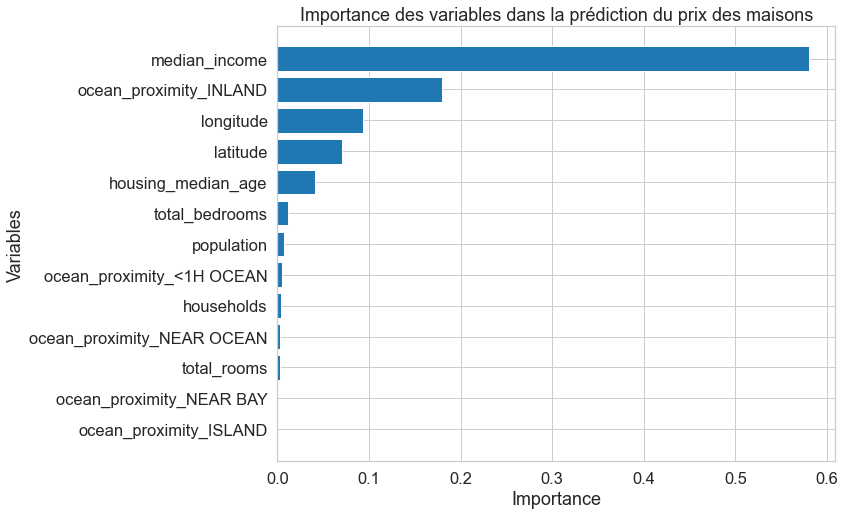

In [33]:
# Affichage de l'importance des variables
importances = pd.Series(tree_optimal.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values()

fig=plt.figure(figsize=(10,8))
plt.barh(importances_sorted.index, importances_sorted)
plt.title('Importance des variables dans la prédiction du prix des maisons')
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.show()
fig.savefig("./Data/output/importanceVariablesDepth9.png",dpi=300)
plt.close(fig)

#### Arbre Optimal

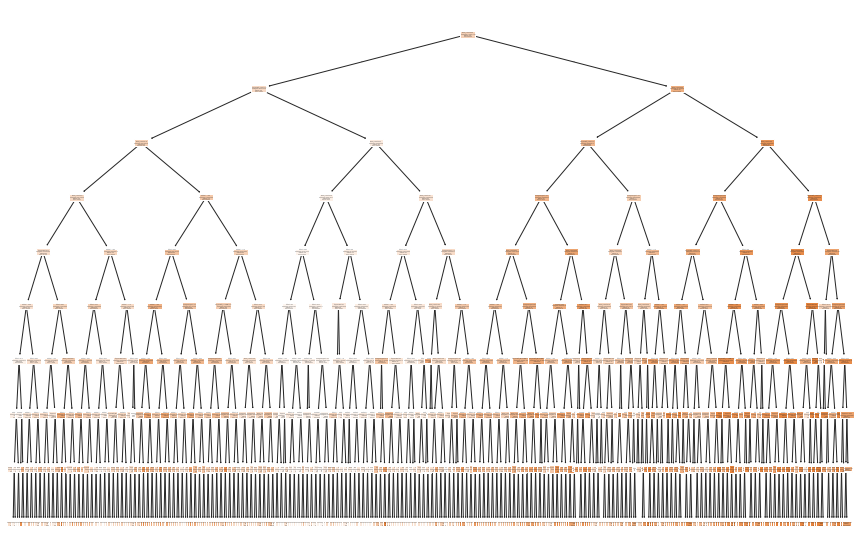

In [34]:
# Affichage de l'arbre
fig=plt.figure(figsize=(15,10))
plot_tree(tree_optimal, feature_names=X_train.columns, filled=True)
plt.show()
fig.savefig("./Data/output/treeOptimal9.png",dpi=300)
plt.close(fig)

In [35]:
## PERFORMANCES


from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score


# Prédiction sur la base d'apprentissage et la base de test
y_train_pred = tree_optimal.predict(X_train)
y_test_pred = tree_optimal.predict(X_test)

# Calcul des métriques sur la base d'apprentissage et la base de test
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_medae = median_absolute_error(y_train, y_train_pred)
test_medae = median_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_evs = explained_variance_score(y_train, y_train_pred)
test_evs = explained_variance_score(y_test, y_test_pred)

# Affichage des résultats dans un tableau
results = pd.DataFrame({'Métrique': ['RMSE', 'MAE', 'MedAE', 'R2', 'EVS'], 
                        'Apprentissage': [train_rmse, train_mae, train_medae, train_r2, train_evs], 
                        'Test': [test_rmse, test_mae, test_medae, test_r2, test_evs]})
results.set_index('Métrique', inplace=True)
results

Apprentissage          Test
Métrique                             
RMSE       52623.909413  61904.295098
MAE        36242.280327  41214.655205
MedAE      25005.760624  27765.288800
R2             0.792840      0.707561
EVS            0.792840      0.707586

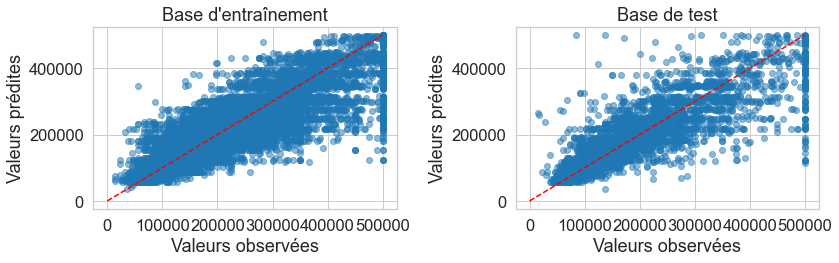

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Graphique pour la base d'entraînement
y_train_pred = tree_optimal.predict(X_train)
axs[0].scatter(y_train, y_train_pred, alpha=0.5)
axs[0].plot([0, np.max(y_train)], [0, np.max(y_train)], 'r--')
axs[0].set_xlabel('Valeurs observées')
axs[0].set_ylabel('Valeurs prédites')
axs[0].set_title('Base d\'entraînement')

# Graphique pour la base de test
y_test_pred = tree_optimal.predict(X_test)
axs[1].scatter(y_test, y_test_pred, alpha=0.5)
axs[1].plot([0, np.max(y_test)], [0, np.max(y_test)], 'r--')
axs[1].set_xlabel('Valeurs observées')
axs[1].set_ylabel('Valeurs prédites')
axs[1].set_title('Base de test')

# Affichage des graphiques
plt.tight_layout()
plt.show()
fig.savefig("./Data/output/graphiquesEntrainementTest9.png")
plt.close(fig)

<div style="border: 1px solid #014040 ;" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="31">3 - 2. Forêt Aléatoire</a></h3>
</div>

In [37]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Premier modèle sans optimisation

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score


# Créer un modèle de forêt aléatoire de régression
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [39]:
# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [40]:
### PERFORMANCES



# Calcul des métriques de performance
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rms_train = mean_squared_error(y_train, y_train_pred, squared=False)
rms_test = mean_squared_error(y_test, y_test_pred, squared=False)

explained_var_train = explained_variance_score(y_train, y_train_pred)
explained_var_test = explained_variance_score(y_test, y_test_pred)

# Affichage des résultats
performance_table = pd.DataFrame({
    'Métrique': ['R²', 'RMS', 'Score expliqué'],
    'Ensemble d\'entraînement': [r2_train, rms_train, explained_var_train],
    'Ensemble de test': [r2_test, rms_test, explained_var_test]
})
performance_table

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Métrique  Ensemble d'entraînement  Ensemble de test
0              R²                 0.975554          0.817015
1             RMS             18077.297213      48967.890603
2  Score expliqué                 0.975555          0.817067

In [41]:
### IMPORTANCE DES VARIABLES

# Obtenir l'importance des variables
importance = model.feature_importances_

# Création d'un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importance': importance
})

# Tri des variables par ordre d'importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Affichage de l'importance des variables
importance_df

Variable  Importance
7                median_income    0.490642
9       ocean_proximity_INLAND    0.140925
0                    longitude    0.105889
1                     latitude    0.101597
2           housing_median_age    0.051935
5                   population    0.032573
4               total_bedrooms    0.023819
3                  total_rooms    0.023366
6                   households    0.018367
12  ocean_proximity_NEAR OCEAN    0.006336
8    ocean_proximity_<1H OCEAN    0.003386
11    ocean_proximity_NEAR BAY    0.000711
10      ocean_proximity_ISLAND    0.000455

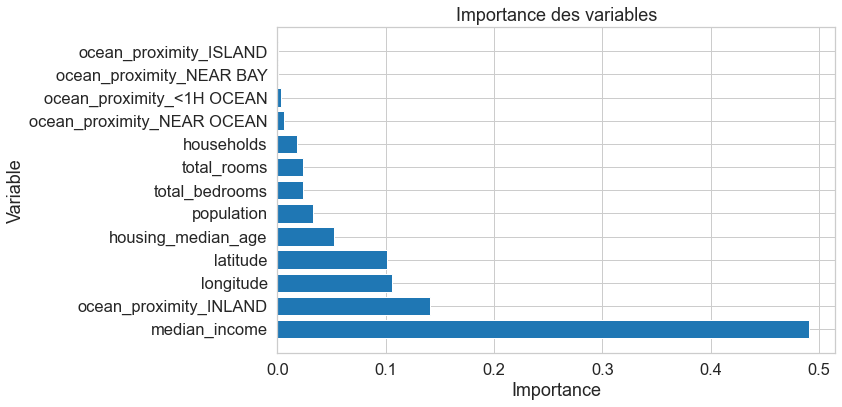

In [42]:
# Graphique de l'importance des variables
fig=plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variable'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables')
plt.show()
fig.savefig("./Data/output/importanceVariableForetNonOptimisee.png",dpi=300)

#### Modèle avec optimisation par validation croisée

In [43]:

# Définir les paramètres à tester
param_grid = {
    'n_estimators': [100,500],
     'max_depth': [None, 5 ,10]
}

# Créer un modèle de forêt aléatoire de régression
model = RandomForestRegressor(random_state=42)

# Recherche par grille pour optimiser les paramètres
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres : ", grid_search.best_params_)



Meilleurs paramètres :  {'max_depth': None, 'n_estimators': 500}


In [44]:
### Prédiction sur la base train et la base test

# Obtenir le meilleur modèle
best_model = grid_search.best_estimator_

# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)


In [45]:
## PERFORMANCE



# Calcul des métriques d'évaluation
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

explained_var_train = explained_variance_score(y_train, y_train_pred)
explained_var_test = explained_variance_score(y_test, y_test_pred)

# Création du tableau de résultats
evaluation_table = pd.DataFrame({
    'Métrique': ['R²', 'MSE', 'Score expliqué'],
    'Ensemble d\'entraînement': [r2_train, mse_train, explained_var_train],
    'Ensemble de test': [r2_test, mse_test, explained_var_test]
})
# Affichage du tableau de résultats
print(evaluation_table)

         Métrique  Ensemble d'entraînement  Ensemble de test
0              R²             9.763033e-01      8.187566e-01
1             MSE             3.167729e+08      2.375029e+09
2  Score expliqué             9.763056e-01      8.188106e-01


                      Variable  Importance
7                median_income    0.489756
9       ocean_proximity_INLAND    0.141501
0                    longitude    0.105832
1                     latitude    0.101102
2           housing_median_age    0.052501
5                   population    0.032789
3                  total_rooms    0.023870
4               total_bedrooms    0.023650
6                   households    0.018028
12  ocean_proximity_NEAR OCEAN    0.006371
8    ocean_proximity_<1H OCEAN    0.003501
11    ocean_proximity_NEAR BAY    0.000758
10      ocean_proximity_ISLAND    0.000341


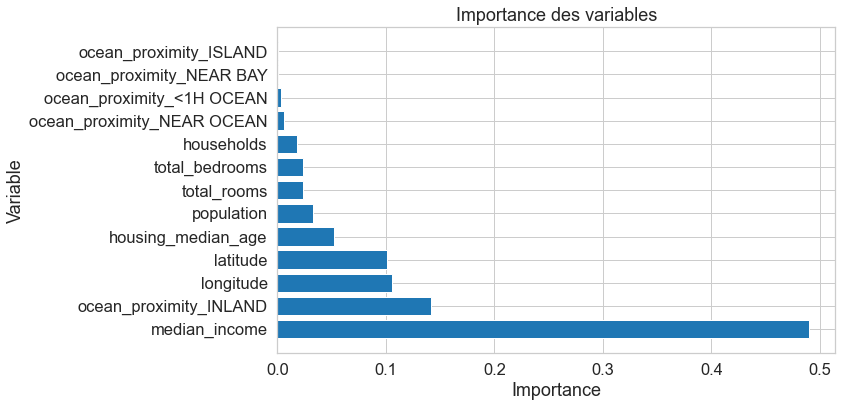

In [46]:
### Importance des variables


# Obtenir l'importance des variables
importance = best_model.feature_importances_

# Création du tableau d'importance des variables
importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importance': importance
})

# Tri des variables par ordre d'importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Affichage du tableau d'importance des variables
print(importance_df)

# Graphique d'importance des variables
fig = plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variable'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables')
plt.show()
fig.savefig("./Data/output/importanceDesVariablesForetOptimise.png")
plt.close(fig)

In [47]:
### Optimisation via RandomizedSearchCV

In [48]:
#### Estimation du modèle

In [49]:
from sklearn.model_selection import  RandomizedSearchCV

# Définir la grille de paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Créer un modèle de forêt aléatoire de régression
model = RandomForestRegressor(random_state=42)

# Recherche aléatoire pour optimiser les paramètres
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring='r2', n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres : ", random_search.best_params_)


Meilleurs paramètres :  {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}


In [50]:
### Prédiction sur la base train et test

In [51]:
# Obtenir le meilleur modèle
best_model = random_search.best_estimator_


# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)



In [52]:
### PERFORMANCES
# Calcul des métriques d'évaluation
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

explained_var_train = explained_variance_score(y_train, y_train_pred)
explained_var_test = explained_variance_score(y_test, y_test_pred)

# Création du tableau de performances
performance_table = pd.DataFrame({
    'Métrique': ['R²', 'MSE', 'Variance expliquée'],
    'Ensemble d\'entraînement': [r2_train, mse_train, explained_var_train],
    'Ensemble de test': [r2_test, mse_test, explained_var_test]
})

# Affichage du tableau de performances
performance_table

Métrique  Ensemble d'entraînement  Ensemble de test
0                  R²             9.760905e-01      8.181684e-01
1                 MSE             3.196174e+08      2.382738e+09
2  Variance expliquée             9.760922e-01      8.182210e-01

                      Variable  Importance
7                median_income    0.490384
9       ocean_proximity_INLAND    0.141366
0                    longitude    0.105698
1                     latitude    0.101170
2           housing_median_age    0.052319
5                   population    0.032625
3                  total_rooms    0.023652
4               total_bedrooms    0.023641
6                   households    0.018241
12  ocean_proximity_NEAR OCEAN    0.006415
8    ocean_proximity_<1H OCEAN    0.003394
11    ocean_proximity_NEAR BAY    0.000714
10      ocean_proximity_ISLAND    0.000381


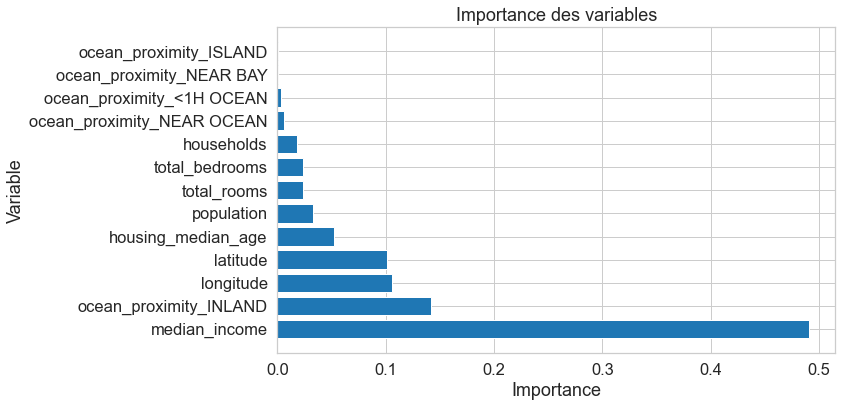

In [53]:
## IMPORTANCE

# Obtenir l'importance des variables
importance = best_model.feature_importances_

# Création du tableau d'importance des variables
importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importance': importance
})

# Tri des variables par ordre d'importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Affichage du tableau d'importance des variables
print(importance_df)

# Graphique d'importance des variables
fig = plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variable'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables')
plt.show()
fig.savefig("./Data/output/importanceVariablesRandomized.png",dpi=300)
plt.close(fig)

<div style="border: 2px solid #731702;" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em ">0.0 - CONCLUSION</h3>
</div>

A l'issue de cette analyse, nous pouvons constater que notre modèle explique 81,82 % de la variabilité, avec une erreur quadratique moyenne de 2,3827e+9 traduite en RMSE (≈48 768), ce qui est raisonnable au regard de la moyenne et de la dispersion des prix des maisons dans cette base de données.
Comme nous avons pu le constater, la méthode de forêt aléatoire (Random Forest) s'avère efficace pour prédire le prix de biens immobiliers dans cette zone.
Cependant, certains ajustements peuvent encore être envisagés afin d'améliorer l'efficacité du modèle.

[RETOUR AU SOMMAIRE](#00)